Задание 1.

Напишите функцию конвертации текста, представленном в шестнацеричном виде, в base64.

Пример:

Входные данные:

49276d207374756479696e672043727970746f677261706879206c696b6520436c6175646520456c776f6f64205368616e6e6f6e21

Выходные данные: 

SSdtIHN0dWR5aW5nIENyeXB0b2dyYXBoeSBsaWtlIENsYXVkZSBFbHdvb2QgU2hhbm5vbiE=


In [99]:
# Описание решения: 
#     1 Декадируем строку из hex
#     2 Кодируем в base64
#     3 Декодируем из bytes в string

In [100]:
import codecs
correct_answer = 'SSdtIHN0dWR5aW5nIENyeXB0b2dyYXBoeSBsaWtlIENsYXVkZSBFbHdvb2QgU2hhbm5vbiE='
hex_str = "49276d207374756479696e672043727970746f677261706879206c696b6520436c6175646520456c776f6f64205368616e6e6f6e21"
b64 = codecs.encode(codecs.decode(hex_str, 'hex'), 'base64').decode()[:-1]
b64 == correct_answer

True

In [101]:
b64

'SSdtIHN0dWR5aW5nIENyeXB0b2dyYXBoeSBsaWtlIENsYXVkZSBFbHdvb2QgU2hhbm5vbiE='

##   

##   

##   

Задание 2.

Напишите функцию, которая принимает в качестве параметров два буфера одинаковой длины и производит операцию XOR над ними.

Пример:

Входные данные:

506561636520416c6c204f7665722054686520576f726c64

XOR

4949544353551c0111001f010100061a021f010100061a02

=

192C352036755D6D7D2050776472264E6A7A21566F747666


In [102]:
# Описание решения: 
#     1 Используем оператор ^ "только или" для побитого преобразования
#     2 Используем формат '%X' для представления строки в 16 шестнадцатеричной системе счисления

In [110]:
a = "506561636520416c6c204f7665722054686520576f726c64"
b = "4949544353551c0111001f010100061a021f010100061a02"

xor_result = int(a, 16) ^ int(b, 16)

print ('%X' % xor_result)

192C352036755D6D7D2050776472264E6A7A21566F747666


##   

##   

Задание 3.

(не использовать метод полного перебора ключа)

Дана строка закодированная в 16-виде. Данную строку получили путем операции XOR некоторого текста с одним символом. Расшифруйте это сообщение. 

Пример:

Входные данные:

19367831362e3d2b2c353d362c783136783336372f343d3c3f3d7839342f39212b782839212b782c303d783a3d2b2c7831362c3d2a3d2b2c

Стадии выполнения задания:

1: выполните задание без программной автоматизации - "на листочке".
2: напишите программу дешифратор.

In [114]:
# Описание решения: 
#     1 Определяем самые часттные символы в тексте
#     2 Так как один из символов может быть самым популярным символом в англ. языке, то используем "е" для получения ключа 
#     3 Переводим "е" в hex
#     4 По очереди с помощью операции XOR получаем ключ
#     5 Применяем получившиеся ключи к исходному тексту 
#     6 Преобразуем текс из hex в нормальный текс
#     7 Проверяем получившийся текс на читаемость (должно получится осмысленное предложение)

In [115]:
import pandas as pd
import codecs

In [116]:
# Метод получения ключа по предполагаемому символу
def xor_result(a, b):
    xor_result = int(a, 16) ^ int(b, 16)
    return '%x' % xor_result

def decod_hex(hex_decode):
    decode = codecs.decode(hex_decode, "hex").decode()
    return decode

In [117]:
inp = '19367831362e3d2b2c353d362c783136783336372f343d3c3f3d7839342f39212b782839212b782c303d783a3d2b2c7831362c3d2a3d2b2c'

# Поиск самых частых символов
df = pd.DataFrame()
res = []
for i in range(0, len(inp), 2):
    res.append(inp[i:i+2])
    
df['hex'] = res
df = pd.DataFrame(df['hex'].value_counts())

In [118]:
df[df.hex==df.hex.max()].index.values

array(['78', '3d'], dtype=object)

In [119]:
# Расшифровка по популярным буквам в алфавите

### Самые часто встречающиеся буквы англиского языка
# possible_str = ['e', 'a', 'o', 'i', 'd']
possible_str = ['e']


top_str = df[df.hex==df.hex.max()].index.values

for top in top_str:
    for str_val in possible_str:
        key = xor_result(top, str_val.encode('ascii').hex())
        res = ''
        
        for i in range(0, len(inp), 2):
            res += chr(int(key, 16) ^ int(inp[i:i+2], 16))
            
        print(f'''Value={top},  Possible="{str_val}  Key="{decod_hex(key)}" ''')       
        print(f'''decod str= "{res}"\n''')


Value=78,  Possible="e  Key="" 
decod str= "+e,+3 61( +1e,+e.+*2) !" e$)2$<6e5$<6e1- e' 61e,+1 7 61"

Value=3d,  Possible="e  Key="X" 
decod str= "An investment in knowledge always pays the best interest"



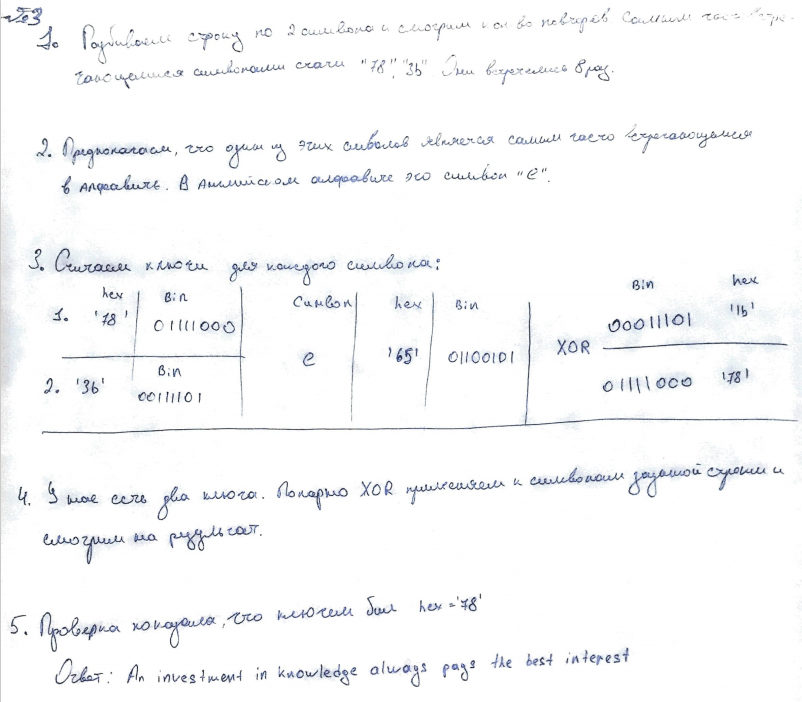

In [136]:
from IPython.display import Image
Image("3.png")

##   

##   

##   

Задание 4.
В качестве входных данных дается файл со строками в hex. Одна из этих строк зашифрована с помощью XOR на одно-символьном ключе. Найдите и расшифруйте эту строку.


In [132]:
# Описание решения: 
#     ------  Все тоже самое как в 3 задании ------
#     1 Определяем самые часттные символы в каждом тексте
#     2 Так как один из символов может быть самым популярным символом в англ. языке,
#       то используем набор самых популярных символов [' ', 'e',  'a', 'o', 'i', 'd'] для получения ключа
#     3 Переводим символы в hex
#     4 По очереди с помощью операции XOR получаем ключ
#     5 Применяем получившиеся ключи к исходному тексту 
#     6 Преобразуем текс из hex в нормальный текс
#     ------ ------  ------  ------  ------  ------
#     7 Фильтруем получившиеся текста с символами, которые не могут содержаться в нормальном тексте 
#     8 Сверяем длину исходного текста и отфильтрованного, длина отфильтрованного должна быть максимально близкой, но не обязательно равно.
#        так как я мог не учесть каких-то символов при фильтрации и отфильтровать нормальные
#     9 Проверяем глазами читаемость отфильтрованных текстов

In [133]:
import re

In [72]:
text = []
with open('task14.input') as f:
    for line in f:
        text.append(line[:-1])

In [73]:
# Собираем самые частые символы в каждом тексте и формируем DataFrame для удобства 
dict_res = {'text':[], 'value':[], 'max_val':[], 'len_values':[]}
res = []
for line in text:
    count = []
    df = pd.DataFrame()
    for i in range(0, len(line), 2):
        count.append(line[i:i+2])

    df['hex'] = count
    df = pd.DataFrame(df['hex'].value_counts())
    dict_res['text'].append(line)
    dict_res['value'].append(df[df.hex==df.hex.max()].index.values)
    dict_res['len_values'].append(len(df[df.hex==df.hex.max()].index.values))
    dict_res['max_val'].append(df.hex.max())

In [74]:
dfg = pd.DataFrame(dict_res)

In [122]:
# Метод декодирования из 3-его задания
def decod(text, inp):
    
    df = pd.DataFrame()
    possible_str = [' ', 'e',  'a', 'o', 'i', 'd']

    top_str = text

    for top in top_str:
        for str_val in possible_str:
            key = xor_result(top, str_val.encode('ascii').hex())
            res = ''
            
            for i in range(0, len(inp), 2):
                res += chr(int(key, 16) ^ int(inp[i:i+2], 16))
            
            df = df.append({'Value':top, 'Possible':str_val, 'Key':key, 'Decod_res':res},  ignore_index=True)
    
    return df

In [123]:
from tqdm import tqdm_notebook

In [124]:
# Декодируем наши строки 
df = pd.DataFrame()
for i in tqdm_notebook(range(0, dfg.shape[0])):
    df = df.append(decod(dfg.value.values[i], dfg.text.values[i]))

<ipython-input-124-1f71f51b408a>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0, dfg.shape[0])):


  0%|          | 0/501 [00:00<?, ?it/s]

In [127]:
# Фильтруем текста
df['filter_chr'] = df.Decod_res.apply(lambda x: re.sub("[^A-Za-z. ]","",x))

In [129]:
# Отбираем текста с примерно одинаковой длинно
df['filter_chr_len'] = df.filter_chr.apply(lambda x: len(x))
df['Decod_res_len'] = df.Decod_res.apply(lambda x: len(x))

In [137]:
# Ответ
df[df.Decod_res_len*0.90<=df.filter_chr_len].Decod_res

6    Kakim umnym ja sebja chuvstvuu
Name: Decod_res, dtype: object

##   

##   

Задание 5.
Реализуйте шифрование XOR'ом с повторяющимся ключом.


Пример:

Входные данные: ссылка

Ключ: Shannon

Результат: 00000000000000730b0e001a1d07311d150b0a4f1a3c4815060b4f083a0d0d0a4e0008730b13171e1b0f3d090d171d061d730e0e1c4e010f27010e000f034e370d070b001c0b730c141c070109733f0e1c020b4e0409134e272642736208000d031b37010f094e07072048030f1d060d731f0e1c054f013d4802010a0a0c210d000507010973090f0a4e1c0b301d130b4e1b0b3f0d020103021b3d01020f1a06013d1b4f


In [ ]:
# Описание решения: 
#     1 Переводим текс и ключ в двоичную систему исчисления 
#     2 Делаем ключ равной длинны с текстом путем дублирования ключа  
#     3 Применяем XOR к тексту и ключу
#     4 Преобразуем результат в hex
#     5 Проверяем на корректность

In [159]:
import binascii

## Преобразование текста в двоичную систему
def text_to_bits(text, encoding='utf-8', errors='surrogatepass'):
    bits = bin(int(binascii.hexlify(text.encode(encoding, errors)), 16))[2:]
    return bits.zfill(8 * ((len(bits) + 7) // 8))

In [160]:
## Увеличение длинны ключа в соответствии с длиной текста
def key_len(key, text):
    full_duplicate = len(text)//len(key)
    partial_duplication = len(text)%len(key)
    
    res = key*full_duplicate
    res+=key[:partial_duplication]
    
    return res

In [161]:
## Операция XOR на двоичных строках
def xor_bin(a, d):
    res = ''
    for i in range(0, len(a)):
        res += str(int(inp_bin[i], 2) ^ int(key_bin[i], 2))
    return res

## Преобразование из двоичной в шестнадцатеричную систему
def bin_to_hex(s):
    res = ''
    for i in range(0, len(str(s)), 4):
        res += hex(int(s[i:i+4], 2))[2:]   
    return res

In [162]:
correct_answer = '00000000000000730b0e001a1d07311d150b0a4f1a3c4815060b4f083a0d0d0a4e0008730b13171e1b0f3d090d171d061d730e0e1c4e010f27010e000f034e370d070b001c0b730c141c070109733f0e1c020b4e0409134e272642736208000d031b37010f094e07072048030f1d060d731f0e1c054f013d4802010a0a0c210d000507010973090f0a4e1c0b301d130b4e1b0b3f0d020103021b3d01020f1a06013d1b4f'
key = 'Shannon'

In [163]:
with open('task15.input') as f:
    inp = f.read()
    if inp.endswith('\n'):
        inp = inp[:-1]

In [164]:
#### Перевести все в двоичу
inp_bin = text_to_bits(inp)

In [165]:
#### Уравниваем длины текста и ключа и переводим в двоичку
key_bin = text_to_bits(key_len(key, inp))

In [166]:
#### XOR-им ключ с текстом
xor = xor_bin(inp_bin, key_bin)

In [167]:
#### Преобразуем результат в hex и сравниваем на корректность
bin_to_hex(xor) == correct_answer

True

##   

##   

##   

Задание 6.
Задание: Расшифруйте данные зашифрованные XOR'ом с повторяющимся ключом.
Входные данные: ссылка

In [168]:
gg = 'GgAVRRYVUidNVRoKGUMUVSsMGlkcAjcKEhZSAEgpQQMTCQtDB0UuBhlYZSc8TxYNF1REJQxVFAQcDhYMYgUBFgRCcgENEVIVADsIGxYKGUMWSCsHCwpVZBYGERETGlQgGFUaAA8RAQAjBAEXCE4mBwdFHhtOKQ0MUhUHDQBTbmMmFhhOIQAEEVIASClBGRMLCRYMRGIIGw0aAzxPABcXEVopElUUCQEUb3AjGhpZAgt+TwMLFlRLJRIGUggXQw1BKxtCWQ4ANk8BDRcRS2BBFBwBTg4KVTYBT3MnDz4JT0gEEUkgBBFSDB1DEUgnSQ0YAwNyHAkcSH5qOREcBgAcRBYAKQAAHgMXcgobAHg1TCMPEFICAgwSU2IPGxUDTjsBQhEaEQA5DxYeChsHAERiOgEMGwZ8ZWgkHhVTbUEUHAFOAAROYhoZHAoaciELAhoAAC0XFBsJThcKACoMDxVlID0bQgocEQAjB1UGDQtDEk8wBQpeHE4lABcLFgcfbCwAARFOKkkAJx8LF08GNx0HSXgnVCUNGVIJBxARRSxJGRAbBnIbCgBSGUkiBVIBRRoMCgA1CAUcCRs+TwcEAH50I0EBGgQaQxZBJkkdFhoANkNCEhodQyRBHBxFAxpFRi4MHRFPJ3IJBwAeTyofDgAcAU4MAwA3BxwcHBo7AQVJUgFOPgQfHQwNCgtHYg8LHBtCWDgLERpURikXEAAMHQtFUzYMHgpPASBPEQkdAyoKDgdSABgGFwxiHQFZDgA2TwQXHVgqHAAWGwsJQxFIJ0kJGBZCchsKFx0aRykFWVIDHAoATiYFCwocQnIcFgocDQA/FQcXABpcbyoMCBoMHQtyBhFFFAZFKVpVEBAaQyhBLEkaEQpONxsHFxwVTGwSGRMTC2kqRmIKDwsKTjMBBkUCFVM/CBocS04uEFM2SSdZCws3AkIRGhVUbBUHBwBRaTJJNgFOHwYLPgsRRRMaRGwQABsAGkMNQTQMTg4KTjwAFwIaAAA4DlUWCkJpJ0UhCBsKCk49GhBFAQRJPggBAUUIDBcAJx8LC08NIA4UAFIVTihBFgAEGAZJKgMHClkBCyQKEEUUG1UiBVUGDQsKFwAxCBoQHAgzDBYMHRoANQQBTW85DBdMJkVOEBxOJgcbRRoRQT4VVQEKTgAKTCZFZCoATjYKBxUeDQA7BBQAHE4CC0RiBgIdQ2QGBwMRUgBINUEGHQkLQwdVMQAAHBwdcgYRRRABVGwVGlIDARECRTZWZHMhAX5PDApTVFQkBAYXRR4GF0YnChpZGxw3ChFJUgNJOAlVBQ0HEBVFMAAAHk8YPQYBAF5+dCQEBhdFCA8KVycbHVVPGjoOFkUaFVYpQQEdRRoLAEViCE4KAAIzDAdFEBFFIk1/MwsKQxxFNkkPF08PPgYHC1IHTyAAFhdJThAKADEMHBwBC1g7CgALVEwlFxBeRQ8NAQArB04NBws7HUIJGxJFbBIQFwhOFwoAMAwEFgYNN1RoKRsSRWwJGgVFGw0JSSkMTg0ATiYHCwsXVQAYCRABAE4FCU81DBwKQ04mBwcWF1RUPgQQAUlkIhdFYgoGEAMKIAoMRR0SACMPEFIHBxERSEg+Bw0HTiYHBwBeVG9sLBQcXk4CFgAHCBwNB0JYKgMXBhwMbBIBGwkCQxZPYg8PEB1CcgkNF1IVTCBBARocThEEViMOCwpDZFgmEUUBHVM4BAdSEQFDHE8sSRwYCwczARZFOAFQJRUQAElkNA1PYh4HDQdOIRoBDVITTCMTHB0QHUMETiZJGxcbHD0aAAkXEAArAA8XbzsTCk5iAQcKTwElAUIGHQFSPwRVEBAcDQxOJUkKFhgAcicHBAQRTmsSVQUEFxBvYSEbAQocTjYKBxVSB0UtElUdA04HBFIpBwsKHE4+AA0OAVRBOEEdFxdPaTVFMAoGGAENN08LC1IcST9BAxMWGkMHTzEGA1kHC35PFgodWAAnBBACFmQvDEsnSQgcHQM3ARZJUhhJJwRVFgwdFxdFMRpVczYLJk8WFxMaUTkIGVIWBgoLRTFJABYbTj4KERZefmwjExFSCghDEUgnSQAQCAYmQ0IRGhVUbBMaBwsKQw1JMUkdCQMLPAsNEABUUyAEEAIWQA=='

In [170]:
# ...